In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_excel

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
principal_matrix= np.loadtxt("principal_matrix.csv", delimiter= ",")
with open("labels.csv") as f:
    l= f.read()
    try: # Mac
        int(l[1:2])
        l= l[1:]
    except: # Windows
        l= l[3:]
    
    labels= np.array(l.split(), dtype= int)


nonzero_index= labels!= 0
labels= labels[nonzero_index]
principal_matrix= principal_matrix[nonzero_index]


In [4]:
X_train, X_test, y_train, y_test= train_test_split(principal_matrix, labels, test_size= .2, random_state= 42)
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

svr= SVR(C= 100, gamma= .1, epsilon= .1)

param_grid = [
  {'C': np.logspace(1, 4, 7), 'kernel': ['linear']},
  {'C': np.logspace(1, 4, 7), 'gamma': np.logspace(-1, -4, 7), 'kernel': ['rbf']},
 ]

model= GridSearchCV(svr, param_grid= param_grid)

In [5]:
model.fit(X_train, y_train)
print(sorted(model.cv_results_))

y_pred= model.predict(X_test)

mae= mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_gamma', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
Mean Absolute Error: 34.385767991319746
R^2 Score: 0.016936874833803683


(0.0, 180.0, 0.0, 180.0)

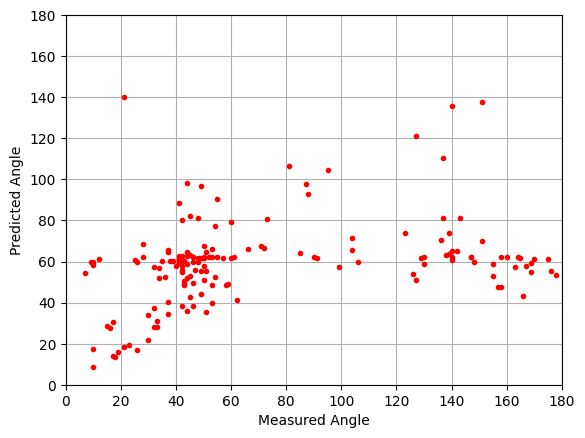

In [8]:
plt.plot(y_test, y_pred, "r.")
plt.grid()
plt.xlabel("Measured Angle")
plt.ylabel("Predicted Angle")
plt.axis([0, 180, 0, 180])
